In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
#iris.data

In [5]:
#iris.target

In [6]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
from sklearn import tree
print(tree.export_graphviz(clf))


digraph Tree {
node [shape=box] ;
0 [label="X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]"] ;
2 -> 3 ;
4 [label="gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]"] ;
2 -> 4 ;
}


In [15]:
import numpy as np
X = np.array([50,10,300])
W = np.array([70,-6, -0.1])
np.dot(X,W)

3410.0

In [19]:
import numpy as np
X = np.array([70, 10, 300, 20])
W1 = np.random.randn(4,5)
X1 = np.dot(X,W1) 
W2 = np.random.randn(5,1)
np.dot(X1, W2)

array([25.09552131])

In [20]:
def rectifier(x):
  return np.maximum(0, x)
  
a = np.array([-1,-2,4])
rectifier(a)

array([0, 0, 4])

In [21]:
import numpy as np
X = np.array([70, 10, 300, 20])
W1 = np.random.randn(4,5)
X1 = np.dot(X,W1) 
X2 = rectifier(X1)
W2 = np.random.randn(5,1)
np.dot(X2, W2)

array([-245.77415874])

In [25]:
% tensorflow_version 2.x

In [27]:
import tensorflow as tf

In [28]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Activation, Dense

In [29]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [30]:
x_train.shape

(60000, 28, 28)

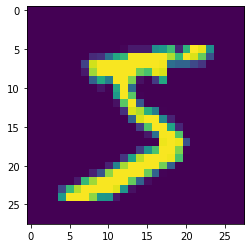

In [31]:
from matplotlib import pyplot as plt
plt.imshow(x_train[0])

In [33]:
y_train[0]

5

In [34]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

In [37]:
n_classes  = 10 
y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_test  = tf.keras.utils.to_categorical(y_test, n_classes)

In [38]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 

training_epochs = 15
batch_size = 100

In [39]:
model = tf.keras.Sequential()
model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [42]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/15
600/600 [==============================] - 4s 6ms/step - loss: 0.2394 - accuracy: 0.9299 - val_loss: 0.1171 - val_accuracy: 0.9631
Epoch 2/15
600/600 [==============================] - 3s 6ms/step - loss: 0.0922 - accuracy: 0.9712 - val_loss: 0.0914 - val_accuracy: 0.9704
Epoch 3/15
600/600 [==============================] - 3s 5ms/step - loss: 0.0591 - accuracy: 0.9818 - val_loss: 0.0783 - val_accuracy: 0.9753
Epoch 4/15
600/600 [==============================] - 3s 6ms/step - loss: 0.0414 - accuracy: 0.9872 - val_loss: 0.0781 - val_accuracy: 0.9754
Epoch 5/15
600/600 [==============================] - 3s 6ms/step - loss: 0.0339 - accuracy: 0.9893 - val_loss: 0.0781 - val_accuracy: 0.9762
Epoch 6/15
600/600 [==============================] - 3s 6ms/step - loss: 0.0248 - accuracy: 0.9919 - val_loss: 0.0641 - val_accuracy: 0.9816
Epoch 7/15
600/600 [==============================] - 3s 6ms/step - loss: 0.0192 - accuracy: 0.9937 - val_loss: 0.0734 - val_accuracy: 0.9808
Epoch 

## 驗證碼識別

In [43]:
! wget https://raw.githubusercontent.com/ywchiu/tibamedl/master/data/captcha_jpg.zip

--2020-06-19 05:01:21--  https://raw.githubusercontent.com/ywchiu/tibamedl/master/data/captcha_jpg.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3818150 (3.6M) [application/zip]
Saving to: ‘captcha_jpg.zip’

captcha_jpg.zip     100%[===================>]   3.64M  10.4MB/s    in 0.3s    

2020-06-19 05:01:22 (10.4 MB/s) - ‘captcha_jpg.zip’ saved [3818150/3818150]



In [44]:
! unzip captcha_jpg.zip > 1.log

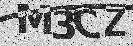

In [45]:
from PIL import Image
Image.open('data/994.jpg')

In [46]:

import pandas
captcha =  pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/output_captua.csv', usecols=['captcua', 'file'])
captcha.columns = ['captcha', 'file']

In [47]:
captcha = captcha[captcha['file'].notnull()]

In [48]:
captcha['file'] = captcha['file'].map(lambda e: 'data/{}.jpg'.format(int(e)) )

In [49]:
captcha.reset_index(inplace=True, drop='index')

In [50]:
captcha.head()

,captcha,file
0,4ay2,data/1.jpg
1,qmqh,data/2.jpg
2,kc3c,data/3.jpg
3,1549,data/4.jpg
4,5rqz,data/5.jpg


In [51]:
from PIL import Image
import numpy as np
img = Image.open('data/3.jpg')
img = img.resize((135,47))
#img
im = np.array(img)
im.shape

(47, 135, 3)

In [52]:
characters = '0123456789abcdefghijklmnopqrstuvwxyz'
height, width = 47,135
n_len = 4
n_class = len(characters)
print(height, width, n_class,n_len)

47 135 36 4


In [53]:
X = np.zeros((len(captcha), height, width, 3), dtype=np.float32)
y = [np.zeros((len(captcha), n_class), dtype=np.uint8) for i in range(n_len)]
X.shape, y[0].shape, len(y)

((998, 47, 135, 3), (998, 36), 4)

In [54]:
for i in captcha.index:
    random_str = captcha.loc[i,'captcha']
    fname = captcha.loc[i,'file']
    img = Image.open(fname)
    img = img.resize((width, height))
    im = np.array(img)
    X[i] = im * 1.0 / 255.0
    for j, ch in enumerate(random_str):
        y[j][i, :] = 0
        y[j][i, characters.find(ch)] = 1

In [55]:

import random
def gen(batch_size=32):
    X = np.zeros((batch_size, height, width, 3), dtype=np.uint8)
    y = [np.zeros((batch_size, n_class), dtype=np.uint8) for i in range(n_len)]
    while True:
        for i in range(batch_size):
            rand_index = random.choice(captcha.index)
            random_str = captcha.loc[rand_index,'captcha']
            fname = captcha.loc[rand_index,'file']
            img = Image.open(fname)
            img = img.resize((width, height))
            im = np.array(img)
            X[i] = im / 255.0

            for j, ch in enumerate(random_str):
                y[j][i, :] = 0
                y[j][i, characters.find(ch)] = 1
        yield X, y

In [56]:
%tensorflow_version 2.x
import tensorflow as tf

In [57]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

In [58]:
input_tensor = Input((height, width, 3))

x = input_tensor
x = Conv2D(64, (3, 3), activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu')(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x) 

x = Conv2D(256, (3, 3), activation='relu')(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x) 

x = Flatten()(x)
x = Dropout(0.25)(x)

In [59]:
x = [Dense(n_class, activation='softmax', name='c%d'%(i+1))(x) for i in range(4)]

model = Model(inputs=input_tensor, outputs=x)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 47, 135, 3)] 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 45, 133, 64)  1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 43, 131, 64)  36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 21, 65, 64)   0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [60]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [61]:
history = model.fit_generator(gen(batch_size=32),      # 每次生成器會產生32筆小批量的資料
                    epochs=3,                # 總共跑5個訓練循環
                    steps_per_epoch=100,
                    #callbacks=cbks,          # 保存最好的模型到檔案
                    validation_data=gen(),   # 驗證資料也是用生成器來產生
                    validation_steps=40      # 用40組資料來驗證
                   )

Instructions for updating:
Please use Model.fit, which supports generators.
10/10 [==============================] - 48s 5s/step - loss: 12.8933 - c1_loss: 3.2091 - c2_loss: 3.2026 - c3_loss: 3.2210 - c4_loss: 3.2606 - c1_accuracy: 0.0875 - c2_accuracy: 0.0625 - c3_accuracy: 0.0594 - c4_accuracy: 0.0875 - val_loss: 12.2360 - val_c1_loss: 3.0627 - val_c2_loss: 3.0341 - val_c3_loss: 3.0927 - val_c4_loss: 3.0465 - val_c1_accuracy: 0.0703 - val_c2_accuracy: 0.0688 - val_c3_accuracy: 0.0570 - val_c4_accuracy: 0.0570


## 人臉辨識

### 獲取明星圖片

In [65]:
import requests
from bs4 import BeautifulSoup
google_url = 'https://www.google.com/search?ei=gAhqXciWMbCSr7wPgLaqiAE&yv=3&tbm=isch&q={}&vet=10ahUKEwjI1v2Bs6zkAhUwyYsBHQCbChEQuT0IWygB.gAhqXciWMbCSr7wPgLaqiAE.i&ved=0ahUKEwjI1v2Bs6zkAhUwyYsBHQCbChEQuT0IWygB&ijn=1&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_jsfs:Ffpdje,_fmt:pc'
res = requests.get(google_url.format('林志玲', 0))
soup = BeautifulSoup(res.text, 'lxml' )

In [66]:
for alink in soup.select('a img'):
    if alink.get('src'):
        print(alink.get('src'))
        print('======================')

https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR0N1KYcyV-EokA59zeOiMjWToGYHd9gvgjxxY4tXA7mSGgH4bi&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRWH0TM8c8jvT2BEo1uGVOt7BayCyYyFqi-ydASSRFPXq5qj5jn&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSxG-qHkZuRYJ9jUxESgPvNLgT5MPcnUU4W_bnkm15n59tRTALfXQ&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSc26Lfrl849SdExIcalyp_-ybv9Euo6wOBZh0ZIbvUFsAgGmP2&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTG0VnPrVXy0oVxM7AM6xNRe8zcgJHzS0BAxs897MgTziV1urxW&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQq9zfbeX51K2ezYE0n5Yo2kbDq-q-oapwOTeFyy28vQhl4tsR3fw&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ7qJmlBQeRBDSF8L4l9u8M4xm0hs63PeiekASa4Z5dtlAa_UjIyg&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTlkUMl3CSa_9aNjOM1RIjBYKRifrhTXeuUtbRxp4PT9iGvdEaL&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQBrU5TgAiY2e2-waHrw5DcJko9hnT4Zk8ZG0t7bniK0Pb6kjQa&s
https://encrypted-tbn0.gstatic.

In [70]:
def getPicture(path, url):
    res = requests.get(url)
    with open('{}/{}.jpg'.format(path, url.split('tbn:')[1]) , 'wb') as f:
        f.write(res.content)

In [76]:
import requests
import os
from bs4 import BeautifulSoup
google_url = 'https://www.google.com/search?ei=gAhqXciWMbCSr7wPgLaqiAE&yv=3&tbm=isch&q={}&vet=10ahUKEwjI1v2Bs6zkAhUwyYsBHQCbChEQuT0IWygB.gAhqXciWMbCSr7wPgLaqiAE.i&ved=0ahUKEwjI1v2Bs6zkAhUwyYsBHQCbChEQuT0IWygB&ijn=1&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_jsfs:Ffpdje,_fmt:pc'

def getIdolImage(path, term, pagenum):
    if not os.path.exists(path):
        os.mkdir(path)
    for p in range(pagenum):
        res = requests.get(google_url.format(term, p* 100))
        soup = BeautifulSoup(res.text, 'lxml' )
        for alink in soup.select('a img'):
            if alink.get('src'):
                getPicture(path, alink.get('src'))

In [77]:
getIdolImage('idol1','夏于喬', 10)

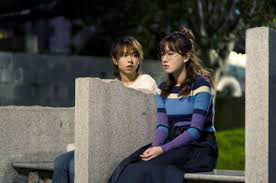

In [80]:
from PIL import Image
Image.open('idol1/ANd9GcQ09lrFuTOnsrEXcRYY8tCVEYPGfldD-3LSOnqEHZ3rHPOZspZ7xQ&s.jpg')

In [81]:
getIdolImage('idol2','宋芸樺', 10)

In [82]:
getIdolImage('idol3','隋棠', 10)

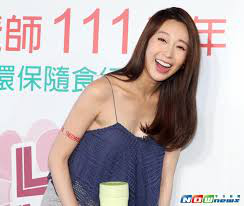

In [84]:
#! ls idol3
Image.open('idol3/ANd9GcSLMNhh9NP6ZJaK7Za6fqBsku79ySHhKFZROCDO3uCa5a-UCcbL&s.jpg')

### 使用OpenCV 擷取人臉部分

In [85]:

import cv2 as cv

In [86]:
! wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2020-06-19 05:55:38--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  5.81MB/s    in 0.2s    

2020-06-19 05:55:39 (5.81 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [87]:
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
img = cv.imread('idol3/ANd9GcSLMNhh9NP6ZJaK7Za6fqBsku79ySHhKFZROCDO3uCa5a-UCcbL&s.jpg')
img.shape

(206, 244, 3)

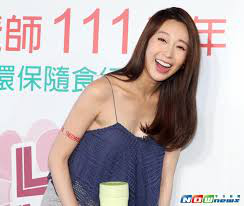

In [90]:
im = Image.open('idol3/ANd9GcSLMNhh9NP6ZJaK7Za6fqBsku79ySHhKFZROCDO3uCa5a-UCcbL&s.jpg')
im

In [88]:
faces = face_cascade.detectMultiScale(img, 1.3, 5)
faces

array([[144,  23,  52,  52]], dtype=int32)

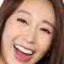

In [91]:
x,y,w,h = faces[0]
box = (x, y, x+w, y+h)
crpim = im.crop(box).resize((64,64))
crpim

In [92]:
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

def cropIdolFace(src, dest):
    if not os.path.exists(dest):
        os.mkdir(dest)
    for filename in os.listdir(src):
        img = cv.imread(src + filename)
        faces = face_cascade.detectMultiScale(img, 1.3, 5)
        if len(faces) == 1:
            im      = Image.open(src + filename)
            x,y,w,h = faces[0]
            box     = (x, y, x+w, y+h)
            crpim   = im.crop(box).resize((64,64))
            crpim.save(dest + filename)

In [94]:
cropIdolFace('idol1/', 'idol1_face/')

In [95]:
cropIdolFace('idol2/', 'idol2_face/')

In [96]:
cropIdolFace('idol3/', 'idol3_face/')

### 使用 CNN 建立人臉識別模型

In [97]:
# Initialising the CNN
classifier = tf.keras.Sequential()

# Convolution
classifier.add(tf.keras.layers.Conv2D(filters=32, 
                                      kernel_size=(3, 3), 
                                      padding = 'same',
                                      input_shape = (64, 64, 3), 
                                      activation = 'relu'))
# Max Pooling
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Convolution
classifier.add(tf.keras.layers.Conv2D(filters=32, 
                                      kernel_size=(3, 3), 
                                      padding = 'same', 
                                      activation = 'relu'))
# Max Pooling
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(tf.keras.layers.Flatten())

# Fully Connected
classifier.add(tf.keras.layers.Dense(units = 128, activation = 'relu')) 
classifier.add(tf.keras.layers.Dropout(rate=0.1)) 
classifier.add(tf.keras.layers.Dense(units = 128, activation = 'relu')) 
classifier.add(tf.keras.layers.Dropout(rate=0.1)) 
classifier.add(tf.keras.layers.Dense(units = 3, activation = 'softmax'))

In [98]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [99]:
classifier.compile(optimizer = 'adam', 
                        loss ='categorical_crossentropy', 
                     metrics = ['accuracy'])

In [100]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,     #x坐标保持不变，而对应的y坐标按比例发生平移
                                   zoom_range = 0.2,      #可以让图片在长或宽的方向进行放大
                                   horizontal_flip = True #水平翻转操作
                                  )

In [101]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [102]:
import os
if not os.path.exists('train/'):
    os.mkdir('train/')
if not os.path.exists('test/'):
    os.mkdir('test/')

In [103]:
import os
from sklearn.model_selection import train_test_split

def splitDataset(dirs):
    dataset = list(os.listdir(dirs))
    train_data, test_data = train_test_split(dataset, test_size= 0.2, random_state = 42)
    
    if not os.path.exists('train/'+dirs):
        os.mkdir('train/'+dirs)
    if not os.path.exists('test/'+dirs):
        os.mkdir('test/'+dirs)

    for f in train_data:
        os.rename(dirs + f, 'train/'+ dirs + f)
    for f in test_data:
        os.rename(dirs + f, 'test/' + dirs +f)

In [104]:
splitDataset('idol1_face/')

In [105]:
splitDataset('idol2_face/')

In [106]:
splitDataset('idol3_face/')

In [107]:
training_set = train_datagen.flow_from_directory(
    'train/', target_size = (64, 64),
     batch_size = 16,
     class_mode = 'categorical')

Found 111 images belonging to 3 classes.


In [108]:
test_set = test_datagen.flow_from_directory(
    'test/', target_size = (64, 64),
    batch_size = 30, 
    class_mode = 'categorical')

Found 29 images belonging to 3 classes.


In [110]:
history = classifier.fit_generator(training_set,
                         epochs=100,
                         validation_steps=16,
                         verbose = 1,
                         validation_data = test_set)

Epoch 1/100
7/7 [==============================] - 1s 117ms/step - loss: 0.7572 - accuracy: 0.6757 - val_loss: 0.9110 - val_accuracy: 0.5517
Epoch 2/100
7/7 [==============================] - 1s 116ms/step - loss: 0.7998 - accuracy: 0.6847 - val_loss: 0.9863 - val_accuracy: 0.4828
Epoch 3/100
7/7 [==============================] - 1s 118ms/step - loss: 0.6415 - accuracy: 0.7297 - val_loss: 1.0652 - val_accuracy: 0.5172
Epoch 4/100
7/7 [==============================] - 1s 117ms/step - loss: 0.7210 - accuracy: 0.6396 - val_loss: 0.9852 - val_accuracy: 0.4828
Epoch 5/100
7/7 [==============================] - 1s 117ms/step - loss: 0.7632 - accuracy: 0.6396 - val_loss: 0.9587 - val_accuracy: 0.5172
Epoch 6/100
7/7 [==============================] - 1s 118ms/step - loss: 0.6587 - accuracy: 0.7207 - val_loss: 1.0060 - val_accuracy: 0.5862
Epoch 7/100
7/7 [==============================] - 1s 119ms/step - loss: 0.7158 - accuracy: 0.6937 - val_loss: 1.1482 - val_accuracy: 0.5517
Epoch 8/100
7

KeyboardInterrupt: ignored

In [111]:
! wget https://www.mirrormedia.com.tw/assets/images/20200618094824-938cbf43676442962d1d434f3da67956-tablet.jpg

--2020-06-19 06:09:05--  https://www.mirrormedia.com.tw/assets/images/20200618094824-938cbf43676442962d1d434f3da67956-tablet.jpg
Resolving www.mirrormedia.com.tw (www.mirrormedia.com.tw)... 35.244.140.142
Connecting to www.mirrormedia.com.tw (www.mirrormedia.com.tw)|35.244.140.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103090 (101K) [image/jpeg]
Saving to: ‘20200618094824-938cbf43676442962d1d434f3da67956-tablet.jpg’

20200618094824-938c 100%[===================>] 100.67K   245KB/s    in 0.4s    

2020-06-19 06:09:06 (245 KB/s) - ‘20200618094824-938cbf43676442962d1d434f3da67956-tablet.jpg’ saved [103090/103090]



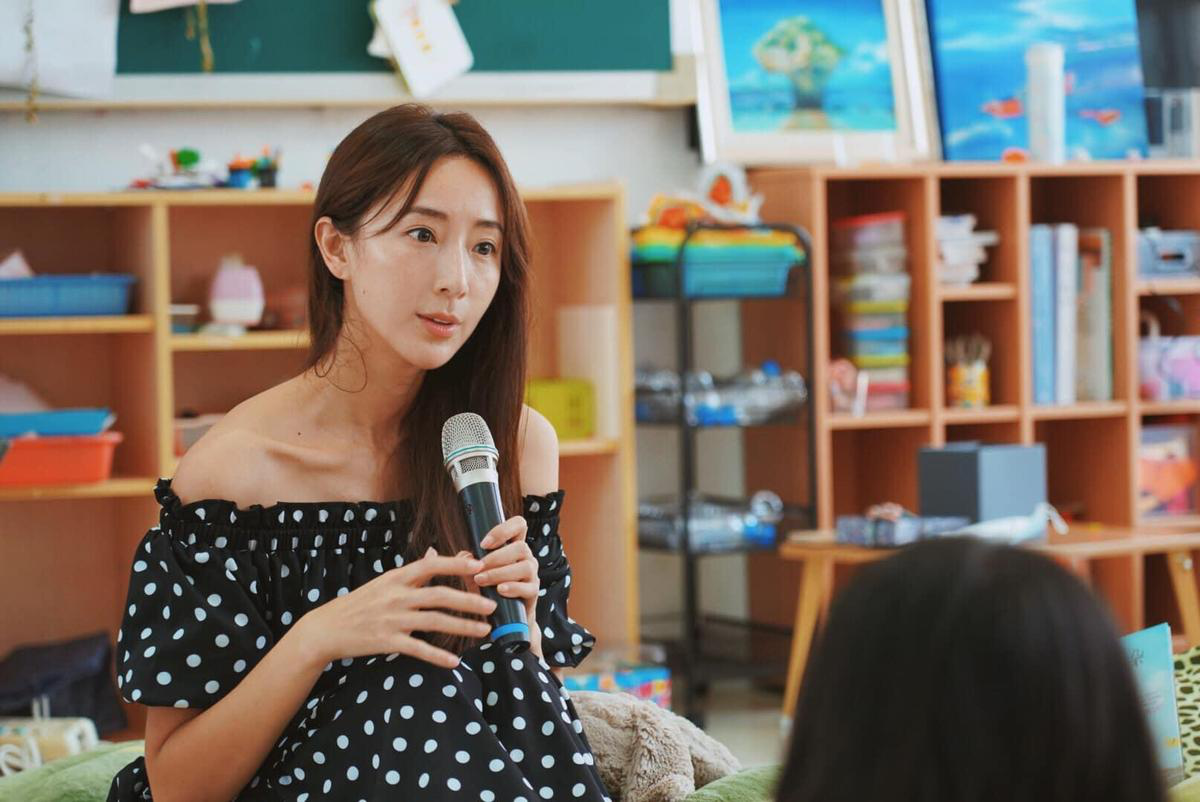

In [112]:
Image.open('20200618094824-938cbf43676442962d1d434f3da67956-tablet.jpg')

In [113]:
img = cv.imread('20200618094824-938cbf43676442962d1d434f3da67956-tablet.jpg')
img.shape

(802, 1200, 3)

In [114]:
faces = face_cascade.detectMultiScale(img, 1.3, 5)
faces

array([[342, 167, 193, 193]], dtype=int32)

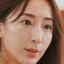

In [115]:
from PIL import Image
im = Image.open('20200618094824-938cbf43676442962d1d434f3da67956-tablet.jpg')
x,y,w,h = faces[0]
box     = (x, y, x+w, y+h)
crpim   = im.crop(box).resize((64,64))
crpim

In [116]:
crpim.save('predict_face.jpg')

In [117]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('predict_face.jpg', target_size= (64,64))
test_image = image.img_to_array(test_image)
test_image.shape

(64, 64, 3)

In [118]:
test_image = np.expand_dims(test_image, axis = 0)
test_image.shape

(1, 64, 64, 3)

In [119]:
classifier.predict_classes(test_image)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([1])

In [120]:
training_set.class_indices

{'idol1_face': 0, 'idol2_face': 1, 'idol3_face': 2}

In [124]:
#classifier.weights